# **Linear Regression**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

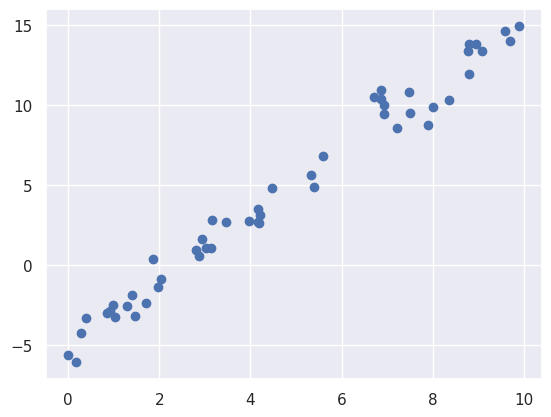

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);


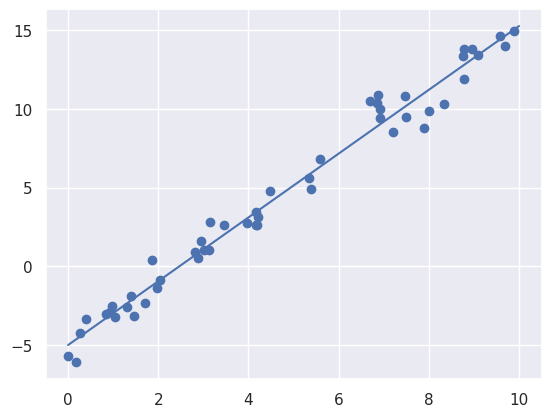

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#print(x[:, np.newaxis].shape)
x=x.reshape(50,1)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.


## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(10), LinearRegression())

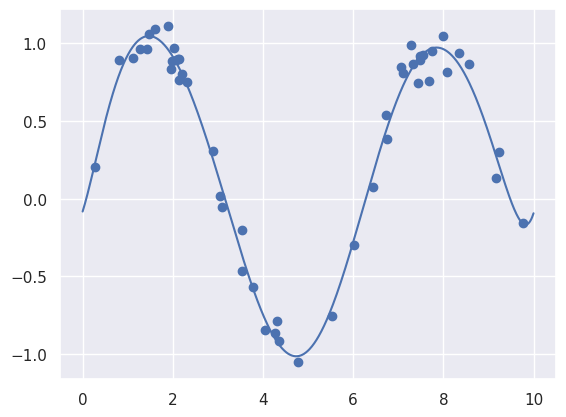

In [ ]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

# **Example**

In [ ]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
dataR=pd.read_csv('/content/NTCM-10K.csv')
print(dataR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          181 non-null    int64  
 1   Temp        181 non-null    int64  
 2   Resistance  181 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.4 KB
None


Text(0.5, 1.0, 'Resistance vs Temperature')

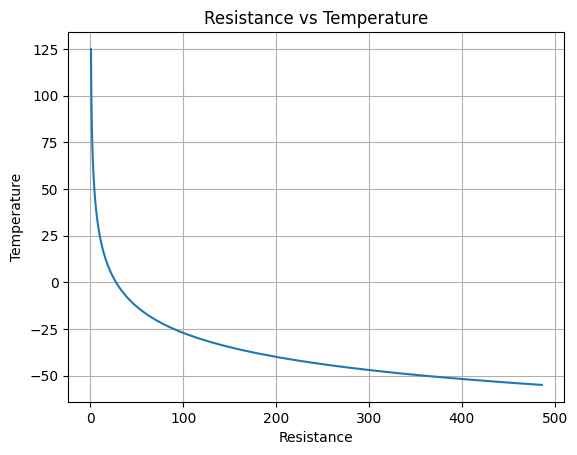

In [ ]:
X=dataR.Resistance
y=dataR.Temp
plt.plot(X,y)
plt.grid(True)
plt.xlabel('Resistance')
plt.ylabel('Temperature')
plt.title('Resistance vs Temperature')


In [ ]:
from sklearn.model_selection import train_test_split
X=X.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 1), (37, 1), (144,), (37,))

Text(0.5, 1.0, 'Resistance vs Temperature')

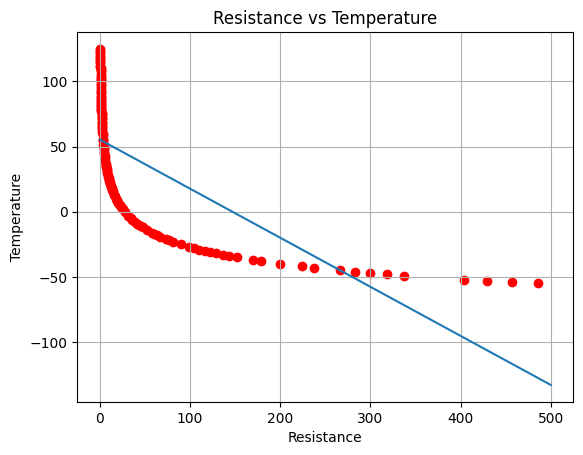

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

xfit = np.linspace(0, 500, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train,color='red')
plt.plot(xfit, yfit)
plt.grid(True)
plt.xlabel('Resistance')
plt.ylabel('Temperature')
plt.title('Resistance vs Temperature')

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
"""
[[  2   4   8]  # For x = 2, the features are: [2, 2^2, 2^3]
 [  3   9  27]  # For x = 3, the features are: [3, 3^2, 3^3]
 [  4  16  64]] # For x = 4, the features are: [4, 4^2, 4^3]
 """

'\n[[  2   4   8]  # For x = 2, the features are: [2, 2^2, 2^3]\n [  3   9  27]  # For x = 3, the features are: [3, 3^2, 3^3]\n [  4  16  64]] # For x = 4, the features are: [4, 4^2, 4^3] \n '

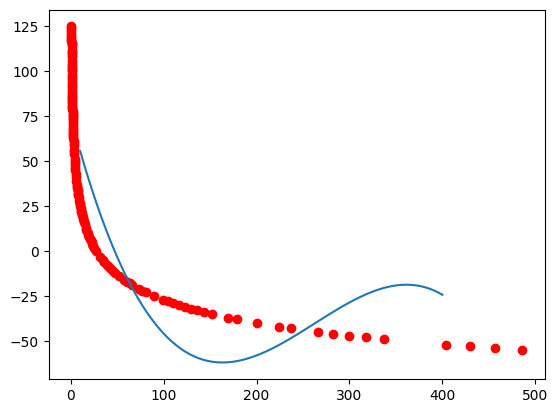

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(X_train, y_train)

xfit = np.linspace(10, 400, 100)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train,color='r')
plt.plot(xfit, yfit);



 **C** controls the trade-off between achieving a low error on the training data and the smoothness of the decision boundary.
 * *Low C:* The model allows more slack for errors on the training data, leading to a smoother model but possibly higher training error. It focuses more on creating a simpler, general model rather than perfectly fitting the data.
 * *High C:* The model tries to fit the training data as closely as possible, allowing fewer errors. This can lead to overfitting, where the model fits even the noise in the data.

**Gamma** defines how much influence a single training example has on the decision boundary.
* *Low gamma:* Each data point has a large influence, which results in a smoother and more generalized model. The decision boundary may be less flexible.
* *High gamma:* Each data point has a small region of influence, making the model more sensitive to individual points. It can lead to more complex decision boundaries, which may cause overfitting.

**Epsilon** defines a margin of tolerance where no penalty is given to errors. In other words, if the model’s predictions are within epsilon distance from the actual values, those errors are ignored.

* *Smaller epsilon:* The model tries to predict as
accurately as possible, but this may increase the complexity of the model.
* *Larger epsilon:* The model allows for more tolerance in errors, resulting in a simpler model that doesn’t fit the training data as tightly.





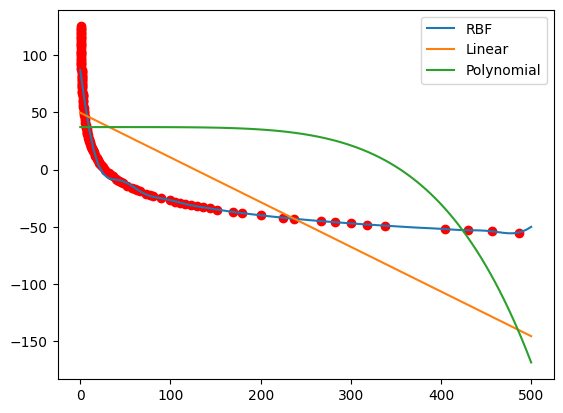

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf",C=100,gamma=0.0005, epsilon=0.01)
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly", degree=3)
svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

xfit = np.linspace(0, 500, 100)
yfit_rbf = svr_rbf.predict(xfit[:, np.newaxis])
yfit_lin = svr_lin.predict(xfit[:, np.newaxis])
yfit_poly = svr_poly.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train,color='r')
plt.plot(xfit, yfit_rbf,label="RBF")
plt.plot(xfit, yfit_lin,label="Linear")
plt.plot(xfit, yfit_poly,label="Polynomial")
plt.legend()